In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Зчитування зображення та його відображення на екрані
def show_image_with_opencv(image_path):
    try:
        image = cv2.imread(image_path)
        cv2.imshow('Зображення', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except Exception as e:
        print("Помилка: ", e)

In [11]:
show_image_with_opencv("image12.jpg")

In [4]:
#Збереження зображення на диск
def save_image_with_opencv(image_path, output_path):
    try:
        image = cv2.imread(image_path)
        cv2.imwrite(output_path, image)
        print(f"Зображення збережено: {output_path}")
    except Exception as e:
        print("Помилка: ", e)

In [5]:
image_path = "image12.jpg"
output_path = "image23.jpg"

save_image_with_opencv(image_path, output_path)

Зображення збережено: image23.jpg


In [7]:
def sobel_filter(image):
    #Використовуємо ядра Собеля для знаходження горизонтальних та вертикальних змін в інтенсивності пікселів
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    #Об'єднуємо результати з двох ядер для отримання загального виходу
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)

    #Нормалізуємо результат у діапазоні [0, 255] для відображення
    sobel = np.uint8(sobel)

    return sobel

#Зчитуємо зображення
image_path = 'image12.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#Застосовуємо фільтр Собеля
sobel_result = sobel_filter(image)

#Відображаємо початкове та оброблене зображення
cv2.imshow('Original Image', image)
cv2.imshow('Sobel Filter Result', sobel_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def median_filter(image, kernel_size):
    # Застосовуємо медіанний фільтр
    return cv2.medianBlur(image, kernel_size)

#Зчитуємо зображення
image_path = 'image12.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#Розмір ядра медіанного фільтра. Зазвичай обирається непарним числом.
kernel_size = 5

#Застосовуємо медіанний фільтр
median_result = median_filter(image, kernel_size)

#Відображаємо початкове та оброблене зображення
cv2.imshow('Original Image', image)
cv2.imshow('Median Filter Result', median_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

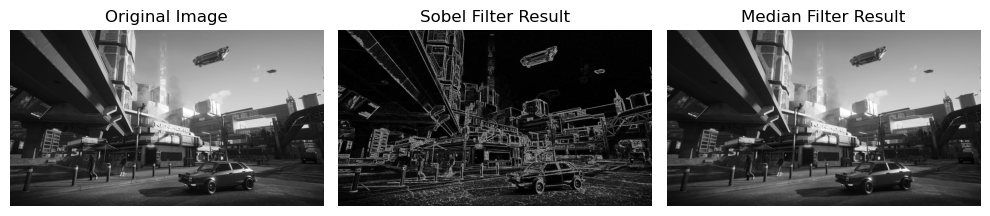

In [12]:
#Порівнюємо результати фільтрів, відображаючи їх на одному зображенні поруч
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel_result, cmap='gray')
plt.title('Sobel Filter Result')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_result, cmap='gray')
plt.title('Median Filter Result')
plt.axis('off')

plt.tight_layout()
plt.show()